In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from os import getcwd

tf.__version__

'2.2.0-rc2'

In [43]:
filePath = f"{getcwd()}/../tmp2"

df_train, info = tfds.load(name='cats_vs_dogs', split='train', with_info=True)
df_test = tfds.load(name='cats_vs_dogs', split='test')



ValueError: ignored

tf.Tensor(1, shape=(), dtype=int64)
Label: 1


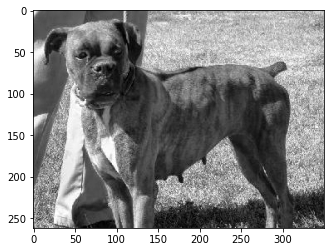

In [9]:
for example in dataset.take(1):  # Only take a single example
  image, label = example["image"], example["label"]
  print(label)

  plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
  print("Label: %d" % label.numpy())

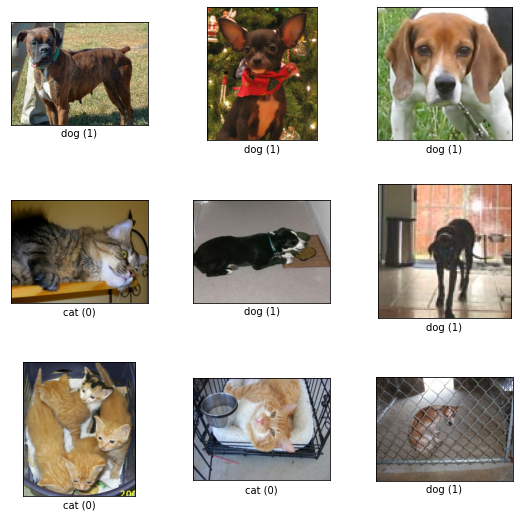

In [11]:
fig = tfds.show_examples(info, dataset)

In [0]:
def preprocess(features):
    image = features['image']
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0
    return image, features['label']

In [0]:
train_dataset = dataset.map(preprocess).batch(32)

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

87916544/87910968 [==============================] - 1s 0us/step
last layer output shape:  (None, 12, 12, 768)


In [0]:
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras import layers
from tensorflow.keras import Model
last_output.trainable = False

# x = layers.Flatten()(last_output)
x = layers.Conv2D(32 , (3,3))(last_output)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adagrad(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [38]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [40]:
batch_size=32
epochs=10

# train_data = ds_train["image"]
# train_targets = ds_train["label"]

# history = model.fit(train_data, train_targets,  
#           epochs=epochs,)  
#           batch_size=32,)

history = model.fit_generator(train_dataset, 
                    # batch_size=batch?_size,
                    epochs=epochs)

Epoch 1/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0487 - acc: 0.9838
Epoch 2/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0460 - acc: 0.9846
Epoch 3/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0446 - acc: 0.9850
Epoch 4/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0434 - acc: 0.9852
Epoch 5/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0426 - acc: 0.9858
Epoch 6/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0412 - acc: 0.9868
Epoch 7/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0410 - acc: 0.9861
Epoch 8/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0387 - acc: 0.9873
Epoch 9/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0386 - acc: 0.9872
Epoch 10/10
727/727 [==============================] - 42s 58ms/step - loss: 0.0378 - acc: 0.9869
